In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import lightgbm as lgb

In [2]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [3]:
data = pd.read_parquet('/main/data/MVideo_2/dataset_main_6_m_4.parquet')

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1163328 entries, 0 to 1163327
Columns: 125 entries, STORE_ID to UNITS_SOLD_P4
dtypes: category(8), datetime64[ns](1), float32(87), int32(29)
memory usage: 543.6 MB


In [5]:
data_train = data[data.DATE < '2018-01-28']

In [6]:
data_train.shape[0]

894852

In [7]:
data_train2 = data[data.DATE <= '2018-02-18']

In [8]:
data_train2.shape[0]

1026469

In [9]:
data_val = data[(data.DATE >= '2018-01-28') & (data.DATE <= '2018-02-18')]

In [10]:
data_val.shape[0]

131617

In [11]:
data_test = data[data.DATE == '2018-03-18']

In [12]:
data_test.shape[0]

34790

In [13]:
feat = [s for s in data.columns if s not in ['DATE', 'UNITS_SOLD_P4']]

In [14]:
dts = lgb.Dataset(data_train[feat], label = data_train.UNITS_SOLD_P4)

In [15]:
dts = dts.construct()

In [16]:
dtsv = dts.create_valid(data_val[feat], label = data_val.UNITS_SOLD_P4)

In [17]:
params = {'application': 'regression_l2',
 'learning_rate': 0.01,
 'num_leaves': 127,
 'min_data_in_leaf': 710,
 'min_sum_hessian_in_leaf': 10,
 'feature_fraction': 0.5,
 'bagging_fraction': 0.7,
 'bagging_freq': 0,
 'lambda_l2': 0.0157,
 'metric': 'l2_root'}

In [18]:
bst = lgb.train(params, dts, valid_sets = [dtsv], valid_names = ['Validation'],
                num_boost_round = 10000, early_stopping_rounds = 20)

[1]	Validation's rmse: 1.78233
Training until validation scores don't improve for 20 rounds.
[2]	Validation's rmse: 1.77698
[3]	Validation's rmse: 1.77071
[4]	Validation's rmse: 1.76393
[5]	Validation's rmse: 1.75709
[6]	Validation's rmse: 1.75163
[7]	Validation's rmse: 1.74596
[8]	Validation's rmse: 1.73977
[9]	Validation's rmse: 1.73412
[10]	Validation's rmse: 1.7287
[11]	Validation's rmse: 1.72382
[12]	Validation's rmse: 1.71832
[13]	Validation's rmse: 1.71285
[14]	Validation's rmse: 1.70753
[15]	Validation's rmse: 1.70176
[16]	Validation's rmse: 1.69719
[17]	Validation's rmse: 1.69159
[18]	Validation's rmse: 1.68645
[19]	Validation's rmse: 1.68201
[20]	Validation's rmse: 1.67642
[21]	Validation's rmse: 1.67107
[22]	Validation's rmse: 1.66651
[23]	Validation's rmse: 1.66192
[24]	Validation's rmse: 1.6572
[25]	Validation's rmse: 1.65347
[26]	Validation's rmse: 1.64766
[27]	Validation's rmse: 1.64319
[28]	Validation's rmse: 1.63852
[29]	Validation's rmse: 1.63479
[30]	Validation's rms

[252]	Validation's rmse: 1.35566
[253]	Validation's rmse: 1.35541
[254]	Validation's rmse: 1.35534
[255]	Validation's rmse: 1.35508
[256]	Validation's rmse: 1.35492
[257]	Validation's rmse: 1.35459
[258]	Validation's rmse: 1.35432
[259]	Validation's rmse: 1.35408
[260]	Validation's rmse: 1.35401
[261]	Validation's rmse: 1.35372
[262]	Validation's rmse: 1.35357
[263]	Validation's rmse: 1.35332
[264]	Validation's rmse: 1.35309
[265]	Validation's rmse: 1.3528
[266]	Validation's rmse: 1.35256
[267]	Validation's rmse: 1.35246
[268]	Validation's rmse: 1.35228
[269]	Validation's rmse: 1.35179
[270]	Validation's rmse: 1.35145
[271]	Validation's rmse: 1.35129
[272]	Validation's rmse: 1.35105
[273]	Validation's rmse: 1.3508
[274]	Validation's rmse: 1.35054
[275]	Validation's rmse: 1.35041
[276]	Validation's rmse: 1.35025
[277]	Validation's rmse: 1.35001
[278]	Validation's rmse: 1.34967
[279]	Validation's rmse: 1.34956
[280]	Validation's rmse: 1.34945
[281]	Validation's rmse: 1.34932
[282]	Valida

[503]	Validation's rmse: 1.31751
[504]	Validation's rmse: 1.31745
[505]	Validation's rmse: 1.31743
[506]	Validation's rmse: 1.31732
[507]	Validation's rmse: 1.31724
[508]	Validation's rmse: 1.31719
[509]	Validation's rmse: 1.3172
[510]	Validation's rmse: 1.31711
[511]	Validation's rmse: 1.3168
[512]	Validation's rmse: 1.31673
[513]	Validation's rmse: 1.31653
[514]	Validation's rmse: 1.31645
[515]	Validation's rmse: 1.31634
[516]	Validation's rmse: 1.31616
[517]	Validation's rmse: 1.31615
[518]	Validation's rmse: 1.31604
[519]	Validation's rmse: 1.31586
[520]	Validation's rmse: 1.31565
[521]	Validation's rmse: 1.3156
[522]	Validation's rmse: 1.31556
[523]	Validation's rmse: 1.31546
[524]	Validation's rmse: 1.31547
[525]	Validation's rmse: 1.31541
[526]	Validation's rmse: 1.31533
[527]	Validation's rmse: 1.31516
[528]	Validation's rmse: 1.31518
[529]	Validation's rmse: 1.31514
[530]	Validation's rmse: 1.31504
[531]	Validation's rmse: 1.31499
[532]	Validation's rmse: 1.31503
[533]	Validat

[753]	Validation's rmse: 1.30365
[754]	Validation's rmse: 1.30366
[755]	Validation's rmse: 1.30365
[756]	Validation's rmse: 1.30366
[757]	Validation's rmse: 1.30365
[758]	Validation's rmse: 1.3036
[759]	Validation's rmse: 1.30356
[760]	Validation's rmse: 1.30352
[761]	Validation's rmse: 1.30349
[762]	Validation's rmse: 1.30342
[763]	Validation's rmse: 1.30335
[764]	Validation's rmse: 1.30329
[765]	Validation's rmse: 1.30325
[766]	Validation's rmse: 1.30328
[767]	Validation's rmse: 1.30321
[768]	Validation's rmse: 1.30313
[769]	Validation's rmse: 1.3031
[770]	Validation's rmse: 1.30304
[771]	Validation's rmse: 1.303
[772]	Validation's rmse: 1.30291
[773]	Validation's rmse: 1.30291
[774]	Validation's rmse: 1.30286
[775]	Validation's rmse: 1.30285
[776]	Validation's rmse: 1.3028
[777]	Validation's rmse: 1.30281
[778]	Validation's rmse: 1.30279
[779]	Validation's rmse: 1.30275
[780]	Validation's rmse: 1.30276
[781]	Validation's rmse: 1.30271
[782]	Validation's rmse: 1.30267
[783]	Validatio

[1002]	Validation's rmse: 1.29657
[1003]	Validation's rmse: 1.29651
[1004]	Validation's rmse: 1.29643
[1005]	Validation's rmse: 1.29642
[1006]	Validation's rmse: 1.29642
[1007]	Validation's rmse: 1.29641
[1008]	Validation's rmse: 1.29639
[1009]	Validation's rmse: 1.29637
[1010]	Validation's rmse: 1.29641
[1011]	Validation's rmse: 1.29639
[1012]	Validation's rmse: 1.29642
[1013]	Validation's rmse: 1.29642
[1014]	Validation's rmse: 1.29642
[1015]	Validation's rmse: 1.29643
[1016]	Validation's rmse: 1.29649
[1017]	Validation's rmse: 1.29656
[1018]	Validation's rmse: 1.29655
[1019]	Validation's rmse: 1.29655
[1020]	Validation's rmse: 1.29647
[1021]	Validation's rmse: 1.29641
[1022]	Validation's rmse: 1.2964
[1023]	Validation's rmse: 1.29645
[1024]	Validation's rmse: 1.29638
[1025]	Validation's rmse: 1.29637
[1026]	Validation's rmse: 1.2963
[1027]	Validation's rmse: 1.29624
[1028]	Validation's rmse: 1.29623
[1029]	Validation's rmse: 1.29621
[1030]	Validation's rmse: 1.29622
[1031]	Validatio

[1244]	Validation's rmse: 1.29333
[1245]	Validation's rmse: 1.29332
[1246]	Validation's rmse: 1.29332
[1247]	Validation's rmse: 1.29336
[1248]	Validation's rmse: 1.29334
[1249]	Validation's rmse: 1.29331
[1250]	Validation's rmse: 1.29328
[1251]	Validation's rmse: 1.29328
[1252]	Validation's rmse: 1.29326
[1253]	Validation's rmse: 1.29323
[1254]	Validation's rmse: 1.29324
[1255]	Validation's rmse: 1.2932
[1256]	Validation's rmse: 1.29319
[1257]	Validation's rmse: 1.29314
[1258]	Validation's rmse: 1.29312
[1259]	Validation's rmse: 1.29307
[1260]	Validation's rmse: 1.29303
[1261]	Validation's rmse: 1.29294
[1262]	Validation's rmse: 1.29294
[1263]	Validation's rmse: 1.29288
[1264]	Validation's rmse: 1.29289
[1265]	Validation's rmse: 1.2929
[1266]	Validation's rmse: 1.29289
[1267]	Validation's rmse: 1.29286
[1268]	Validation's rmse: 1.29286
[1269]	Validation's rmse: 1.29285
[1270]	Validation's rmse: 1.29286
[1271]	Validation's rmse: 1.29283
[1272]	Validation's rmse: 1.29282
[1273]	Validatio

[1486]	Validation's rmse: 1.2904
[1487]	Validation's rmse: 1.2904
[1488]	Validation's rmse: 1.29037
[1489]	Validation's rmse: 1.29039
[1490]	Validation's rmse: 1.29036
[1491]	Validation's rmse: 1.29031
[1492]	Validation's rmse: 1.2903
[1493]	Validation's rmse: 1.29027
[1494]	Validation's rmse: 1.29028
[1495]	Validation's rmse: 1.29024
[1496]	Validation's rmse: 1.29021
[1497]	Validation's rmse: 1.29021
[1498]	Validation's rmse: 1.29018
[1499]	Validation's rmse: 1.29018
[1500]	Validation's rmse: 1.29015
[1501]	Validation's rmse: 1.29013
[1502]	Validation's rmse: 1.29012
[1503]	Validation's rmse: 1.29014
[1504]	Validation's rmse: 1.29013
[1505]	Validation's rmse: 1.29009
[1506]	Validation's rmse: 1.29007
[1507]	Validation's rmse: 1.29007
[1508]	Validation's rmse: 1.29006
[1509]	Validation's rmse: 1.29003
[1510]	Validation's rmse: 1.29002
[1511]	Validation's rmse: 1.28998
[1512]	Validation's rmse: 1.28998
[1513]	Validation's rmse: 1.28994
[1514]	Validation's rmse: 1.28992
[1515]	Validation

In [19]:
pred = bst.predict(data_test[feat])

In [20]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P4, pred))

1.4779604294950972

In [21]:
mean_absolute_error(data_test.UNITS_SOLD_P4, pred)

0.8642188575262924

In [22]:
pred2 = bst.predict(data_val[feat])

In [23]:
res = data_val[['DATE', 'PRODUCT_ID', 'STORE_ID', 'UNITS_SOLD_P4']].copy()

In [24]:
res['PRED_P4'] = pred2

In [25]:
def plot_ts(df, store_id, product_id):
    data_part = df[(df['STORE_ID'] == store_id) & (df['PRODUCT_ID'] == product_id)]
    week_range = data_part.DATE.drop_duplicates().sort_values().values
    #week_range = np.arange(data_part['DATE'].min(), data_part['DATE'].max())# + 1)
    ts = pd.DataFrame()
    ts['DATE'] = week_range
    df = pd.merge(ts, data_part, on = 'DATE', how = 'left')[['DATE', 'UNITS_SOLD_P4', 'PRED_P4']].fillna(0)
    plt.figure(figsize=(15, 4))
    plt.plot(df['DATE'].values, df['UNITS_SOLD_P4'].values, 'g^-', label='true')
    plt.plot(df['DATE'].values, df['PRED_P4'].values, 'ro-', label='pred')
    plt.xlabel('Week')
    plt.ylabel('Units sold')
    max_y = max(1, df['UNITS_SOLD_P4'].max(), df['PRED_P4'].max())
    plt.ylim((-0.05, max_y + 0.1))
    plt.title('The ts for product - %s and store - %s' % (product_id, store_id))
    plt.legend(loc='best')
    plt.show()

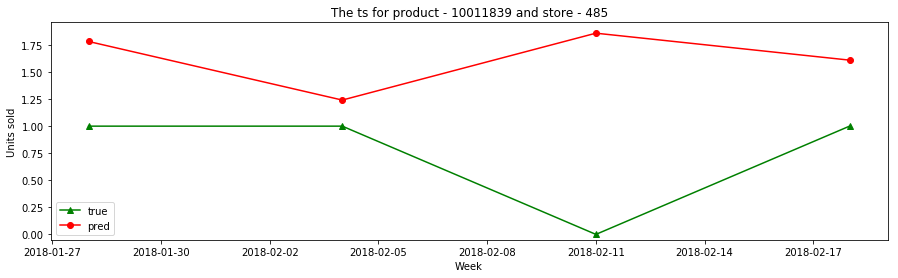

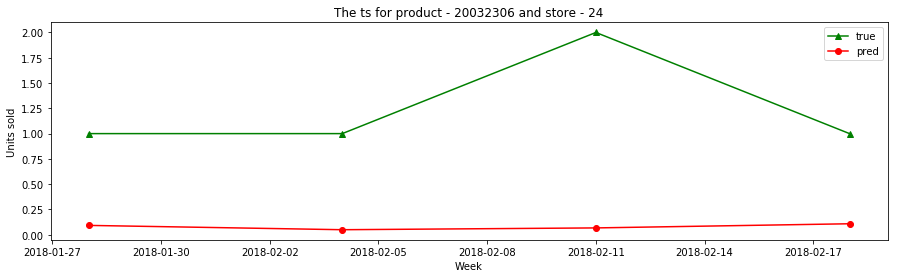

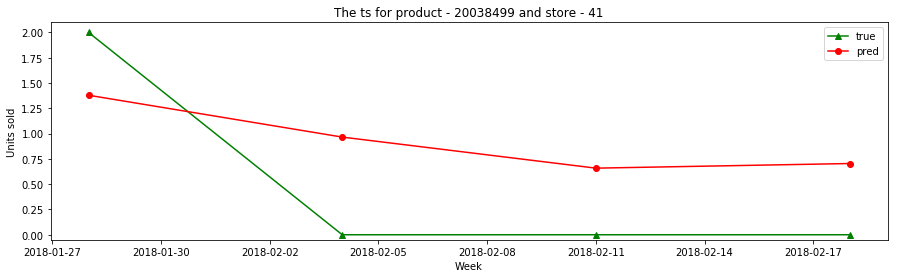

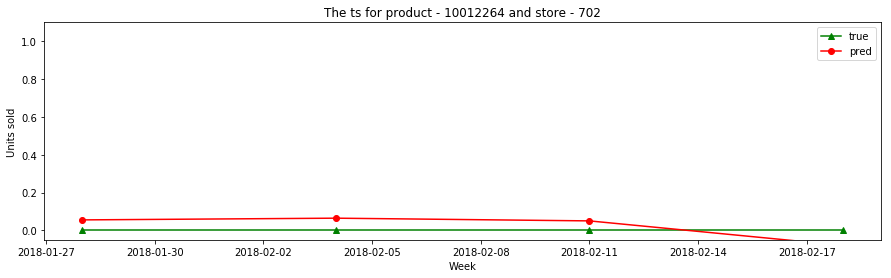

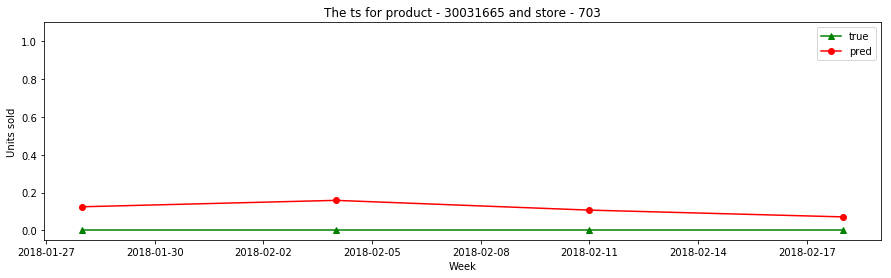

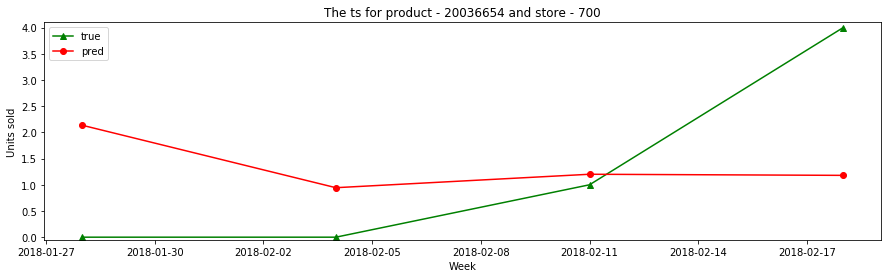

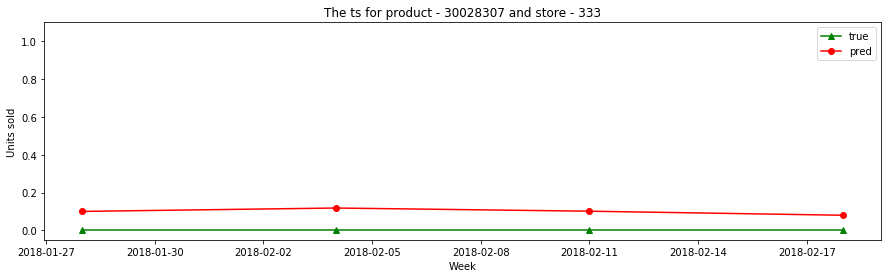

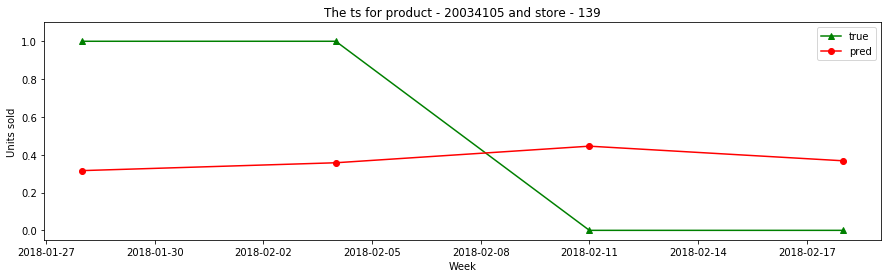

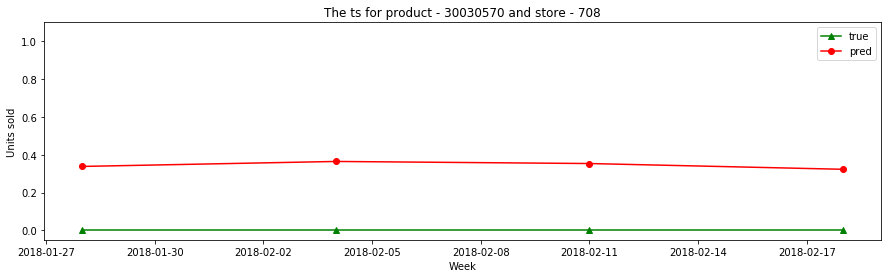

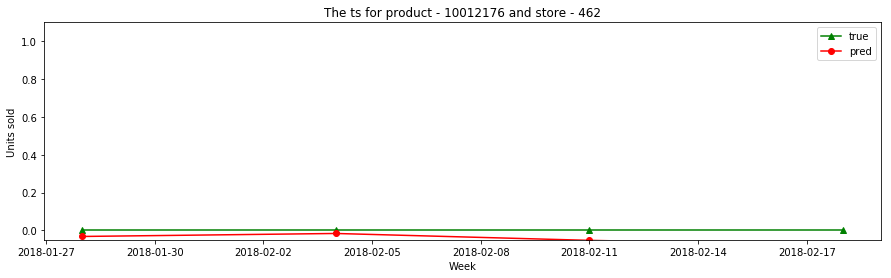

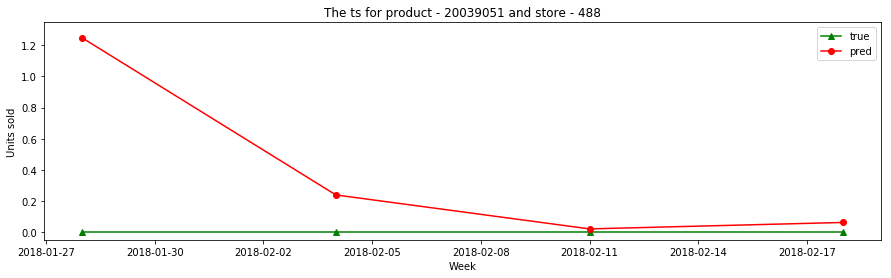

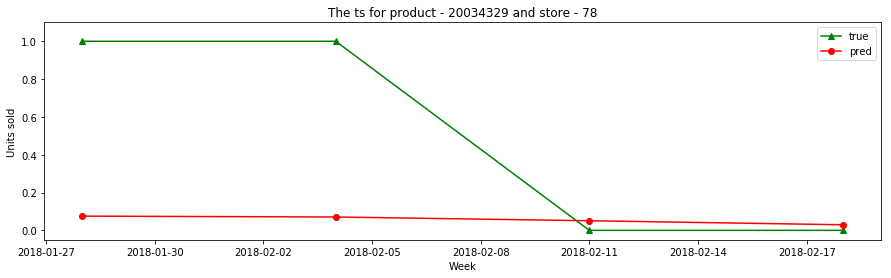

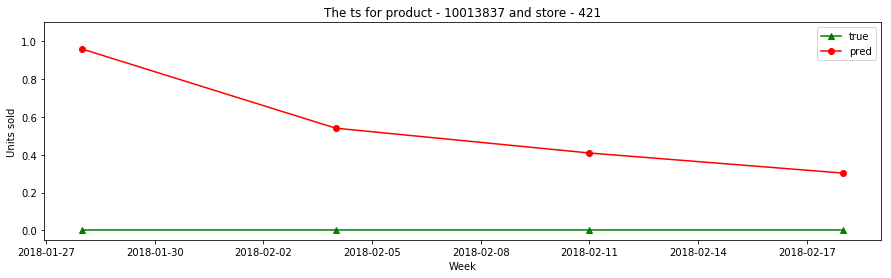

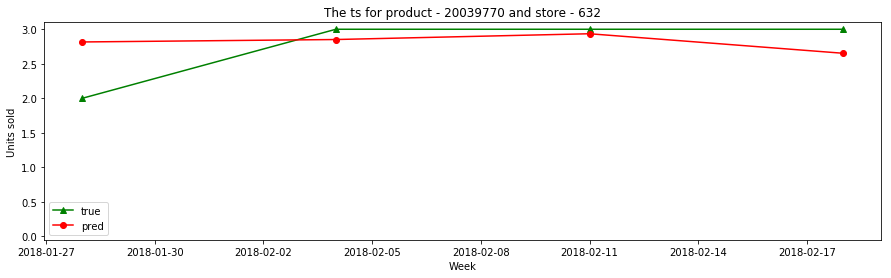

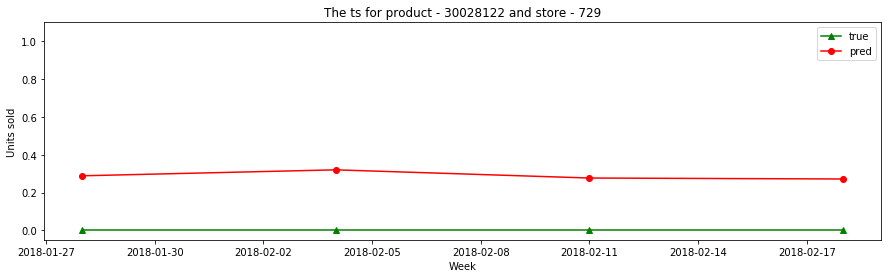

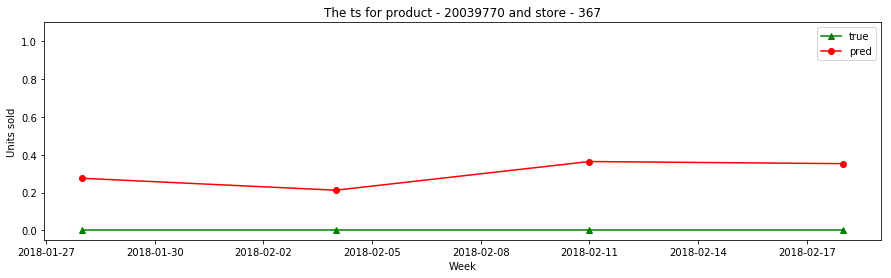

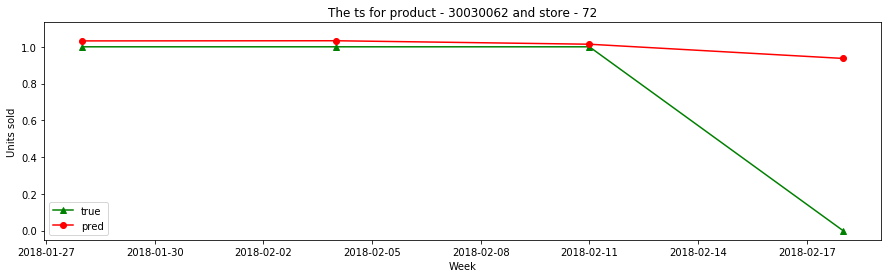

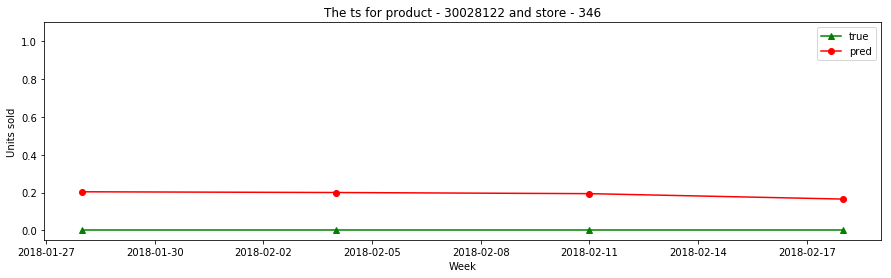

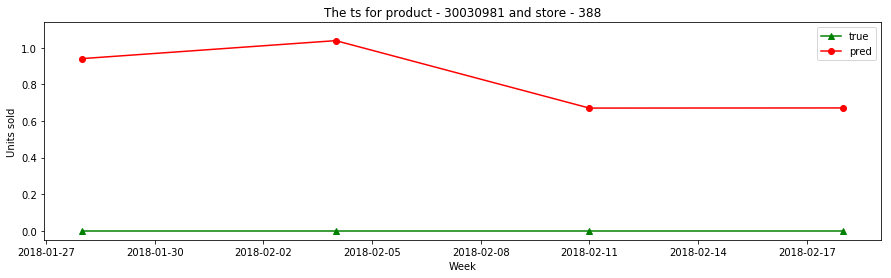

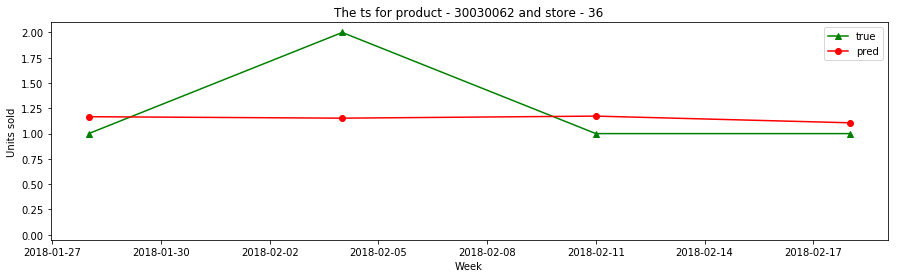

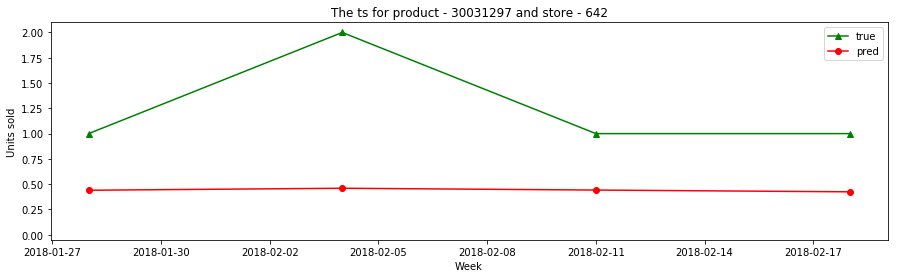

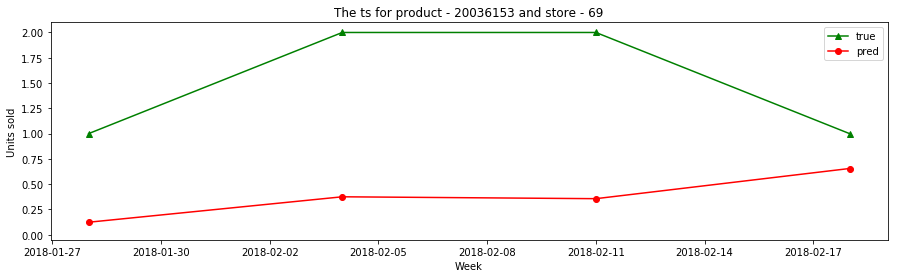

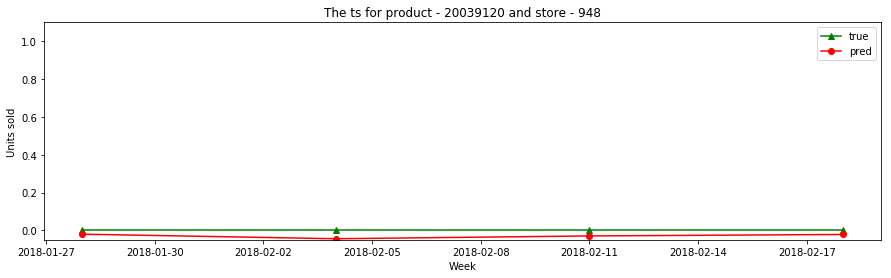

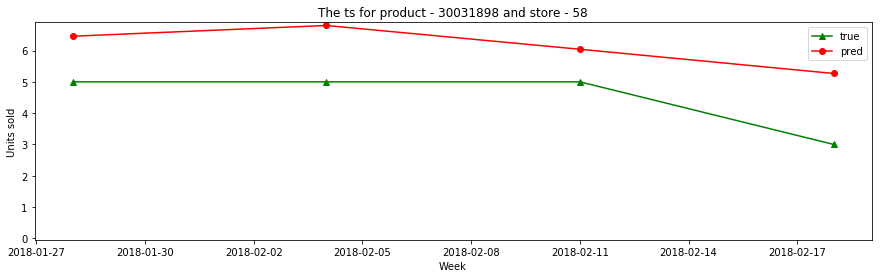

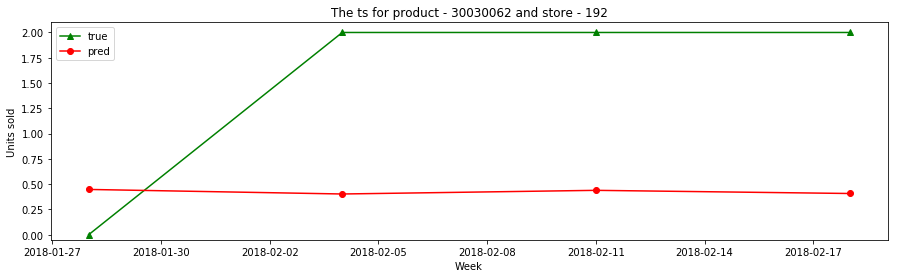

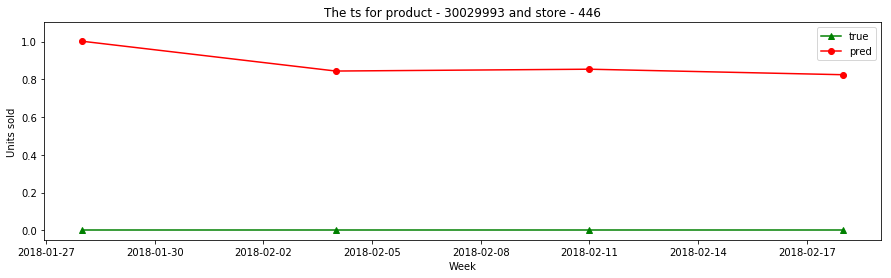

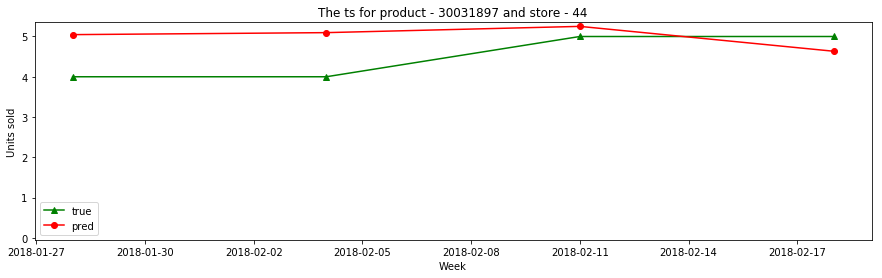

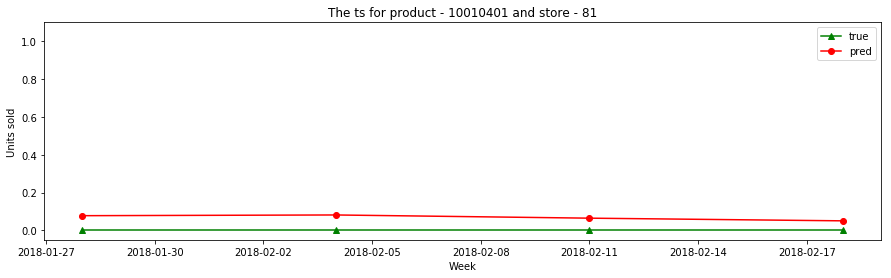

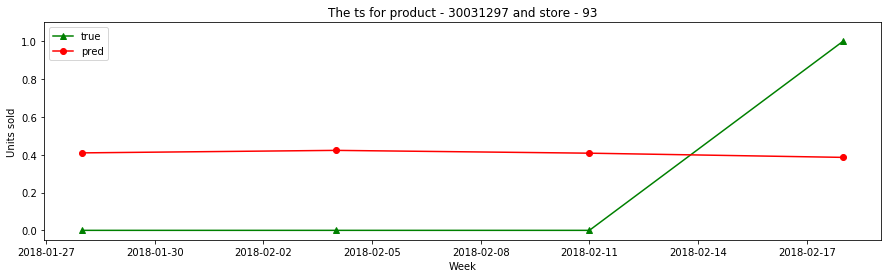

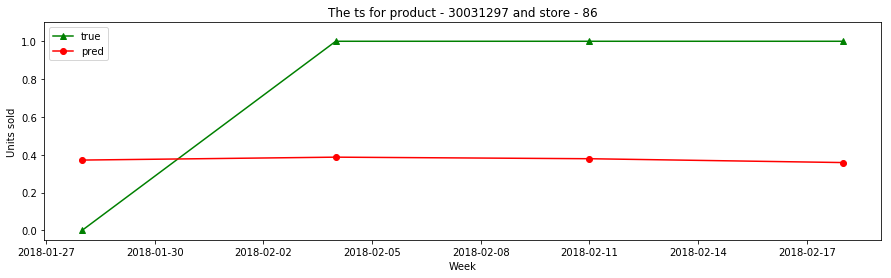

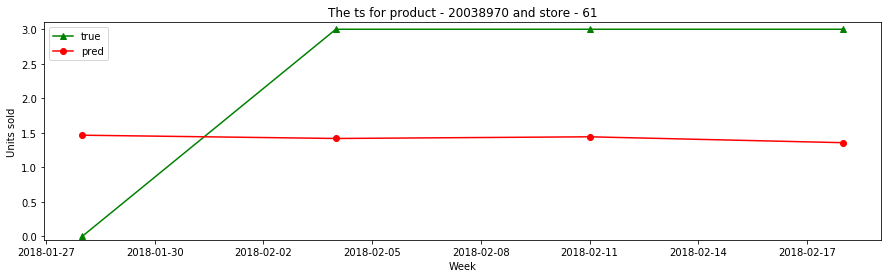

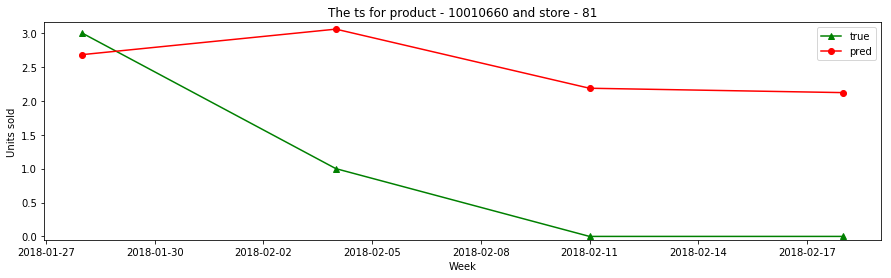

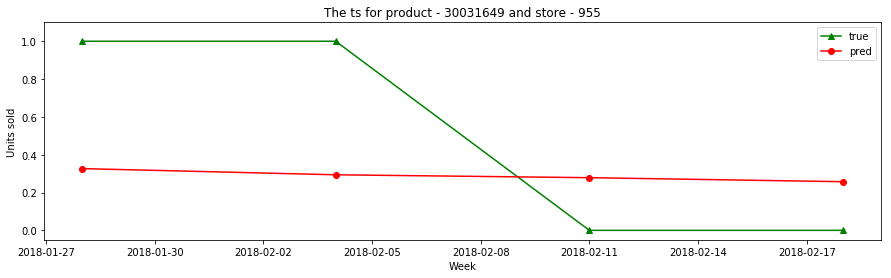

In [26]:
pairs = list(set(zip(res['STORE_ID'], res['PRODUCT_ID'])))

for i in range(len(pairs) // 1000):
    store_id, product_id = pairs[i]
    plot_ts(res, store_id, product_id)

In [27]:
dts2 = lgb.Dataset(data_train2[feat], label = data_train2.UNITS_SOLD_P4)

In [28]:
dts2 = dts2.construct()

In [29]:
bst.current_iteration()

1590

In [30]:
bst2 = lgb.train(params, dts2, num_boost_round = bst.current_iteration())

In [31]:
pred3 = bst2.predict(data_test[feat])

In [32]:
np.sqrt(mean_squared_error(data_test.UNITS_SOLD_P4, pred3))

1.4298478177093985

In [33]:
mean_absolute_error(data_test.UNITS_SOLD_P4, pred3)

0.8424735395163506

In [34]:
sc = bst2.feature_importance(importance_type='gain')

In [35]:
score = pd.DataFrame(100 * sc / np.sum(sc),
                     index = bst2.feature_name(), columns = ['Score'])

In [36]:
score = score.sort_values('Score', ascending=False)

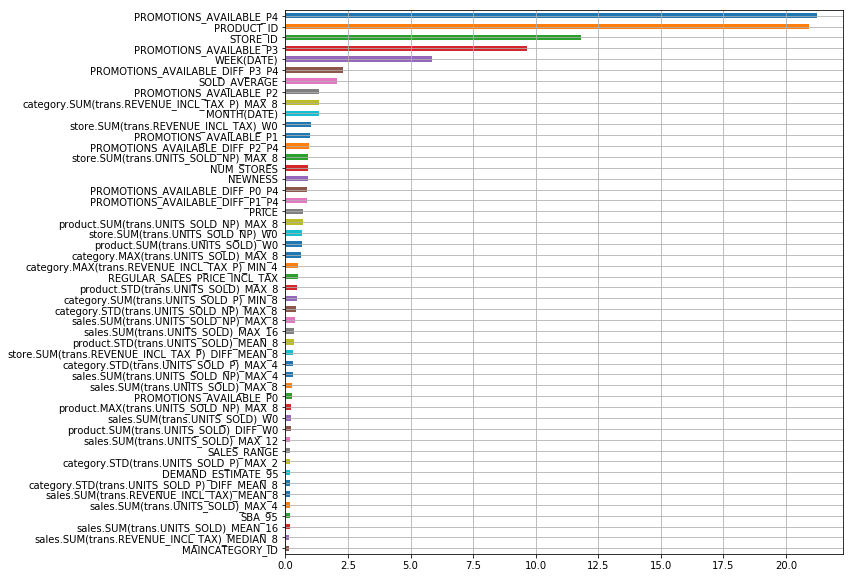

In [37]:
score.head(50).Score.plot.barh(grid=True, figsize=(10,10)).invert_yaxis()

In [38]:
res2 = data_test[['PRODUCT_ID', 'STORE_ID']].copy()

In [39]:
res2['PRED'] = pred3

In [50]:
res3 = pd.read_parquet('/main/data/MVideo_2/dataset_test_6.parquet')

In [51]:
res3 = res3[(res3.DATE > '2018-06-10') & (res3.DATE <= '2018-07-08')].copy()

In [52]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 417480 to 556639
Data columns (total 4 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(1)
memory usage: 3.8 MB


In [53]:
res3 = res3.merge(res2)

In [54]:
res3.PRED /= 4

In [55]:
res3.PRED.clip(lower = 0, inplace = True)

In [56]:
res3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 139160 entries, 0 to 139159
Data columns (total 5 columns):
STORE_ID      139160 non-null category
PRODUCT_ID    139160 non-null category
DATE          139160 non-null datetime64[ns]
UNITS_SOLD    139160 non-null float64
PRED          139160 non-null float64
dtypes: category(2), datetime64[ns](1), float64(2)
memory usage: 4.8 MB


In [57]:
np.sqrt(mean_squared_error(res3.UNITS_SOLD, res3.PRED))

0.6333942345770053

In [58]:
mean_absolute_error(res3.UNITS_SOLD, res3.PRED)

0.33798593075221744

In [59]:
res3.to_parquet('/main/data/MVideo_2/results_6_m_4.parquet')